<h1>Homework 2</h1>
<h2>Data Mining</h2>
Luis Gerson Noboa Martillo

<h3>Exercise 1</h3>
<p><b>1. What is the data about?</b></p>
<p>The data has information regarding work situation of people and the salaries they earn. This data has people from different countries, occupations and field of work (like in state agencies, private, self employed and similar). Aside from basic information such as age, gender and education level, it also has, for some reason, the job satisfaction they're experiencing in their current workplace.</p>

<p><b>2. What are different features and their types (discrete, continuous etc, range of values, possible meaning of the features)?</b></p>
<ol> 
<li>X: An auto-increment column. Type numeric discrete. Range of values: 0 to 32560. Meaning: just an autoincrement value.</li>
<li>Age: Type numeric continuous. Range of values: 17 to 90. Meaning: the age of the employee.</li>
<li>Workclass: Type text, unorder qualitative so it can't be discrete or continuous. Can be Federal-gov, Local-gov, Never-worked, Private, Self-emp-inc, Self-emp-not-inc, State-gov or Without-pay. Meaning: the type of work in which the person is involved, be it for the government, private, self employed, etc.</li>
<li>Education: Type text, unordered qualitative so it can't be discrete or continuous. Can range from all school and high school levels to levels in higher education, such as masters, doctors, etc. Meaning: the last level of education that the person has.</li>
<li>Occupation: Type text, unordered qualitative so it can't be discrete or continuous. Can have several values related to the type of work that the person is currently doing. Meaning: The short description of the work that the person is doing, like sales, tech support, armed forces, etc.</li>
<li>Capital gain: Type numeric discrete. Range of values: 0 to 99999. Meaning: probably can be the gain that the properties of the person experienced in the last year. It is safe to say that if this value has a number greater than 0, then the field Capital loss must have 0.</li>
<li>Capital loss: Type numeric discrete. Range of values: 0 to 99999. Meaning: probably can be the loss that the properties of the person experienced in the last year. It is safe to say that if this value has a number greater than 0, then the field Capital gain must have 0.</li>
<li>Native country: Type text, unordered qualitative so it can't be discrete or continuous. Can have values from 42 different countries. Meaning: the country where the person was born.</li>
<li>Salaries: Type numeric discrete. Range of values: 38.3412463124841 to 140000. Meaning: the salaries that the person makes per year.
</li>
<li>Job satisfaction: Type numeric discrete. Range of values: 0 to 15. Meaning: in a scale from 0 to 15, the level of job satisfaction that the person is currently experiencing.</li>
<li>Male: Type boolean. Range of values: 1, which can be interpreted as true, or NA, which can be interpreted as false. Meaning: the gender of the person recorded is male. If this value is true, then the column Female is false.</li>
<li>Female: Type boolean: Range of values: 1, which can be interpreted as true, or NA, which can be interpreted as false. Meaning: the gender of the person recorded is female. If this value is true, then the column Male is false.</li>
</ol>

<p><b>3. How many rows are in the dataset?</b></p>
<p>32561 rows</p>

<p><b>Data cleaning</b></p>
<p>The tool used for cleaning the data was OpenRefine. The changes were the following:</p>
<ul>
<li>Removed the column X</li>
<li>In column Age, one value -57 changed to 57. Reason: age can't be negative.</li>
<li>In column Age, one value 320 changed to 20. Reason: there's no natural way of living for 320 years, so it was probably a typing error in which the person wanted to type 20 and, because of the closeness of the keys, typed 320. Note that, because of this same fact, it could also be a case in which the person could have wanted to type 2 and typed the 3 by accident. I chose 20 because the information says that he is a high school grad and has a generic "other service" occupation, so it is more likely to be a 20 year old.</li>
<li>In column age, 97 values "?" changed to "NA." Reason: this will make it easier to process in R.</li>
<li>In column Workclass, ten values "privat" changed to "Private." Reason: there is another group of values that have the value Private, so probably this is an input error.</li>
<li>In column Workclass, all workclass values have an space at the beginning, they were removed. Reason: this was probably an error in the application that filled the database. Even though it changes nothing, it's better if the values are as error free as possible. </li>
<li>In column Workclass, 1836 values "?" changed to "NA." Reason: this will make it easier to process in R.</li>
<li>In column Native.country, 891 values "Unitedstates" changed to "United-States." Reason: other countries with spaces in their names have a dash instead of the space, so, to follow that convention, it is better to normalize this value to "United-States" with a dash present.</li>
<li>In column Occupation, 1843 values "?" changed to "NA." Reason: this will make it easier to process in R.</li>
<li>In column Native.country, 882 values "UnitedStates" changed to "United-States." Reason: other countries with spaces in their names have a dash instead of the space, so, to follow that convention, it is better to normalize this value to "United-States" with a dash present.</li>
<li>In column Native.country, 20 values "Hong" changed to "Hong-Kong." Reason: there is no country named Hong, but Hong Kong. Added dash to follow convention of dash instead of space.</li>
<li>In column Native.country, all contry values have a space at the beginning, they were removed. Reason: this was probably an error in the application that filled the database. Even though it changes nothing, it's better if the values are as error free as possible.</li>
<li>In column Native.country, 20 values "South" changed to "South-Korea." Reason: South is not a country, and there are no African countries present in any rows, so this study was probably not done in Africa. Hence, South Korea seems suitable than South Africa.</li>
<li>In column Native.country, 583 values "?" changed to "NA." Reason: this will make it easier to process in R.</li>
<li>In column Jobsatisfaction, one value "Very good" changed to "11." Reason: Probably a satisfied worker but doesn't think that his job satisfaction is excellent, which could award a 15, so a 11 might be a good number to translate this very weird mistake. Unfortunately, this is pure speculation because we don't know how the data was filled.</li>
</ul>

<h3>Exercise 2</h3>


In [97]:
adult = read.table('adult-csv.csv', header = T, stringsAsFactors = F, sep = ",")

<h4>Age</h4>

In [98]:
age = adult$age
#mean
mean(age, na.rm=TRUE)

[1] 38.56034

In [99]:
#median
median(age, na.rm=TRUE)

[1] 37

In [100]:
#max
max(age, na.rm = TRUE)

[1] 90

In [101]:
#min
min(age, na.rm = TRUE)

[1] 17

In [102]:
#sd
sd(age, na.rm = TRUE)

[1] 13.64316

In [103]:
#frequency table
cbind(freq=table(age))

,freq
17,395
18,550
19,712
20,754
21,720
22,765
23,877
24,798
25,841
26,785


In [104]:
#missing values
sum(is.na(age))

[1] 97

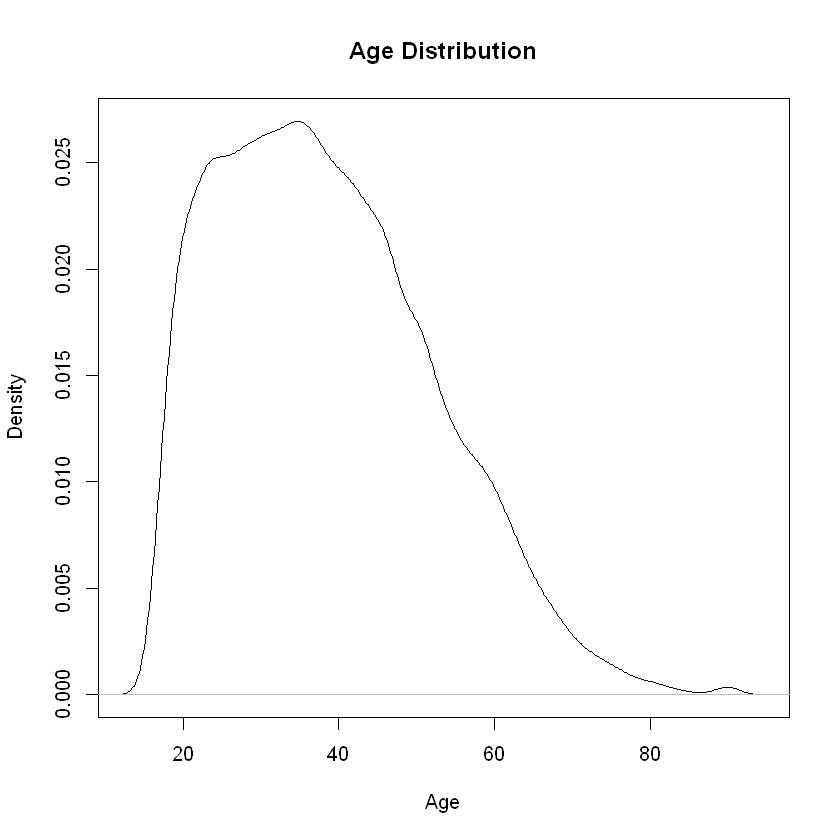

In [105]:
#plot
plot(density(age, na.rm = TRUE), xlab="Age", main = "Age Distribution")

<p><b>Explanation</b><br>
<p>We can see that the average age of the people in the DB is a little more than 38 years old and a half. The median is very similar to the mean, at 37. The oldest person in record is 91 years old and the younger 17. Standard deviation at more than 13 makes it the smaller standard deviation of the whole study.</p>
<p>In the graph we can see that the age distribution is skewed towards the younger ages. Most of the people are grouped between approximately 20 and 40 years old. After that, the density starts to decrease abruptly, until it reaches approximately 65, which is the retirement age. It is interesting to see that even though they could retire at 65, there are some people that still keeps working.</p>

<h4>Workclass</h4>

[1] "Median: Private"

[1] "Max: Without-pay"

[1] "Min Federal-gov"

[1] "Frequency table"


,freq
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


[1] "Missing values:  1836"

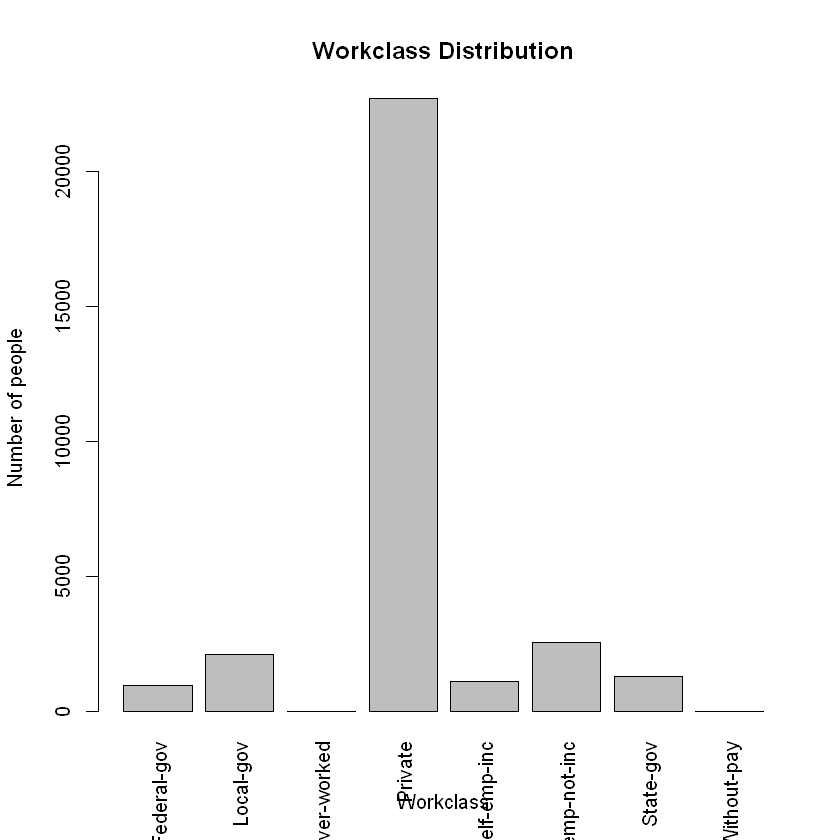

In [106]:
#workclass
workclass = adult$workclass
#median
paste("Median:", median(workclass, na.rm=TRUE))
#max
paste("Max:", max(workclass, na.rm = TRUE))
#min
paste("Min", min(workclass, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(workclass))
#missing values
paste("Missing values: ", sum(is.na(workclass)))
#plot
barplot(table(workclass), main="Workclass Distribution", xlab="Workclass", ylab="Number of people", las=3)

<p>As the values aren't numeric, there's no way of getting the mean. The median, however, is unsurprisingly "Private" since it is the most repeated value in the data set. To determine max and min, seems like R sorts values alphabetically, since the maximum appears as "Without-pay" and the minimum one is "Federal-gov." There's no way of determining standard deviation for text values.</p>
<p>Both the frequency table and the graph shows an overwhelming amount of private values, with values as never worked and without pay appearing really small because of its difference to the private parameter.</p>
<h4>Education</h4>

[1] "Median:  HS-grad"

[1] "Max:  Some-college"

[1] "Min:  10th"

[1] "Frequency table"


,freq
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382
Bachelors,5355


[1] "Missing values:  0"

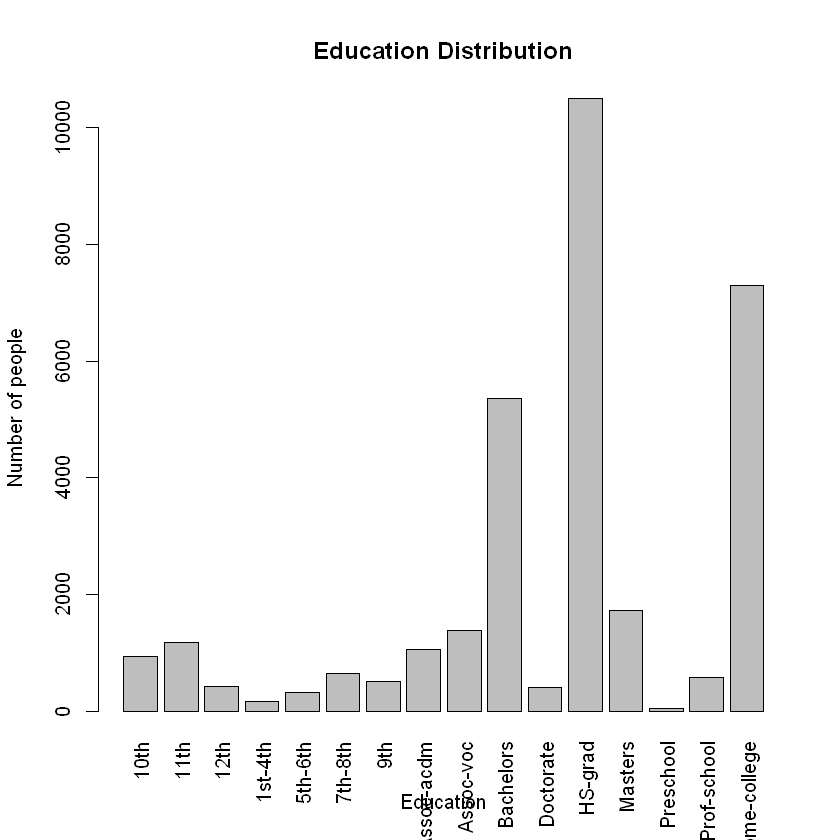

In [107]:
#education
education = adult$education
#median
paste("Median:", median(education, na.rm=TRUE))
#max
paste("Max:", max(education, na.rm = TRUE))
#min
paste("Min:", min(education, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(education))
#missing values
paste("Missing values: ", sum(is.na(education)))
#plot
barplot(table(education), main="Education Distribution", xlab="Education", ylab="Number of people", las=3)

<p>As the values aren't numeric, there's no way of getting the mean. The median, however, is "HS-grad", which probably means High School Graduate. To determine max and min, R sorts values alphabetically, since the maximum appears as "Some-college" and the minimum one is "10th." There's no way of determining standard deviation for text values.</p>

<h4>Occupation</h4>

[1] "Max:  Transport-moving"

[1] "Min:  Adm-clerical"

[1] "Frequency table"


,freq
Adm-clerical,3770
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295
Priv-house-serv,149
Prof-specialty,4140


[1] "Missing values: 0"

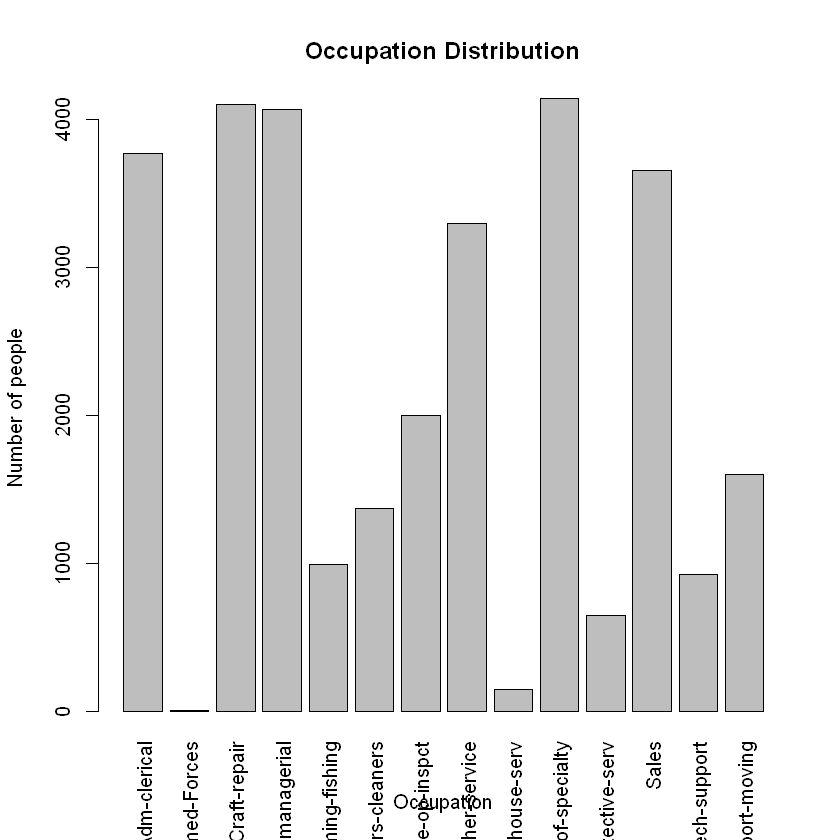

In [108]:
#occupation
occupation = adult$occupation
#max
paste("Max:", max(occupation, na.rm = TRUE))
#min
paste("Min:", min(occupation, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(occupation))
#missing values
paste("Missing values:", sum(is.na(education)))
#plot
barplot(table(occupation), main="Occupation Distribution", xlab="Occupation", ylab="Number of people", las=3)

<p>As the values aren't numeric, there's no way of getting the mean. Also, because the total amount of unique values is even, there's no way of getting the median. To determine max and min, R sorts values alphabetically, since the minimum appears as "Adm-clerical" and the maximum one is "Transport-moving." There's no way of determining standard deviation for text values.</p>

<h4>Capital Gain</h4>

[1] "Mean: 1077.64884370873"

[1] "Median: 0"

[1] "Max: 99999"

[1] "Min: 0"

[1] "Standard deviation: 7385.29208484034"

[1] "Missing values: 0"

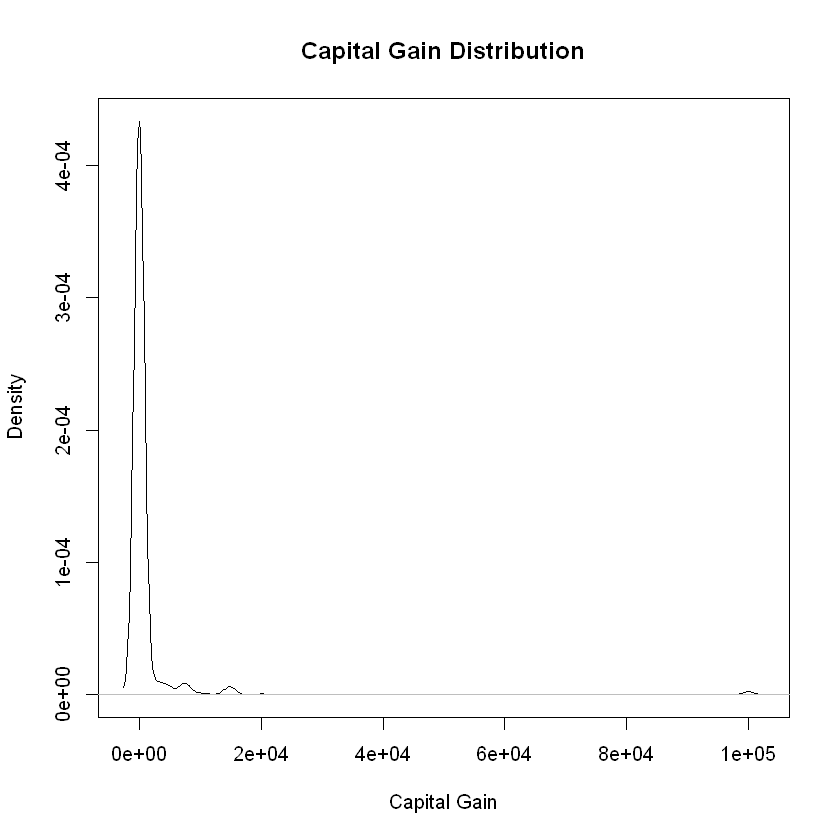

In [109]:
#capital.gain
capital.gain = adult$capital.gain
#mean
paste("Mean:", mean(capital.gain, na.rm=TRUE))
#median
paste("Median:", median(capital.gain, na.rm=TRUE))
#max
paste("Max:", max(capital.gain, na.rm = TRUE))
#min
paste("Min:", min(capital.gain, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(capital.gain, na.rm = TRUE))
#missing values
paste("Missing values:", sum(is.na(capital.gain)))
#plot
plot(density(capital.gain, na.rm = TRUE), xlab="Capital Gain", main = "Capital Gain Distribution")

<p>Since capital gain is not a categorical feature, a frequency table yielded a table very hard to manage, so it was not used.</p>
<p>We can see that the average gain of the people in the DB is a little more than 1077. It is supposed that this value is written in USD. The median and the min is 0, explaining the very low median value compared to the max, 99999. Standard deviation at 7385 makes it very big, but not the biggest.</p>
<p>In the graph we can see that the there's a lot of values in the 0 range, then it drops dramatically and we can see that by the 20000 values, there's almost no people there. A small amount of people are on 99999, maybe signaling that the upper limit of the program used to input data was this one, so if someone had 99999 or more of capital gain, it got registered as 99999.</p>
<h4>Capital Loss</h4>

[1] "Mean: 87.303829734959"

[1] "Median: 0"

[1] "Max: 4356"

[1] "Min: 0"

[1] "Standard deviation 402.960218649"

[1] "Missing values: 0"

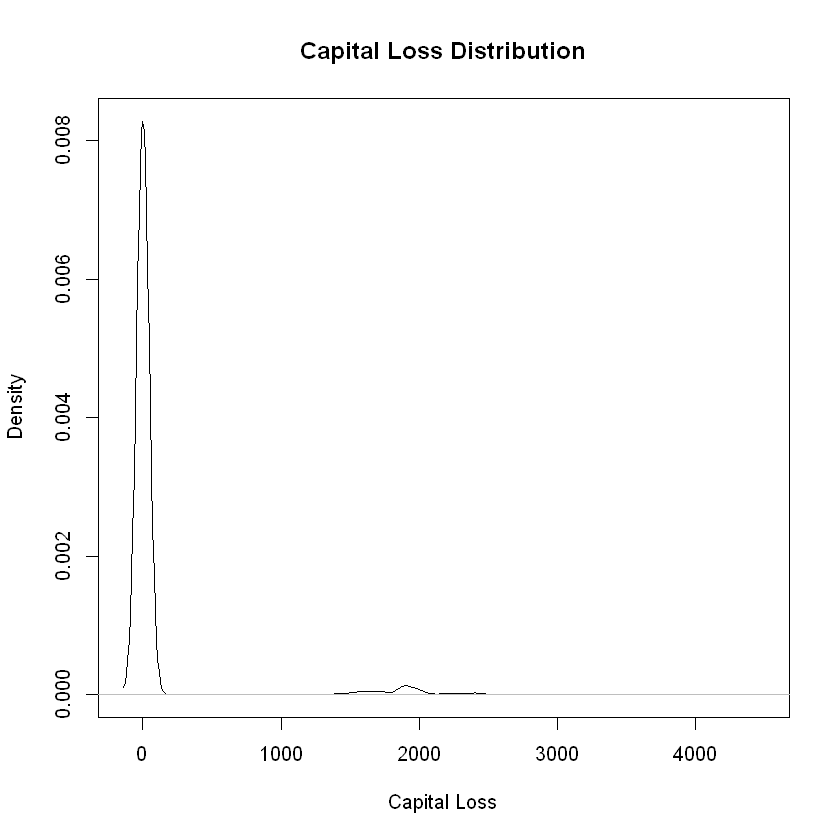

In [110]:
#capital.loss
capital.loss = adult$capital.loss
#mean
paste("Mean:", mean(capital.loss, na.rm=TRUE))
#median
paste("Median:", median(capital.loss, na.rm=TRUE))
#max
paste("Max:", max(capital.loss, na.rm = TRUE))
#min
paste("Min:", min(capital.loss, na.rm = TRUE))
#sd
paste("Standard deviation", sd(capital.loss, na.rm = TRUE))
#missing values
paste("Missing values:", sum(is.na(capital.loss)))
#plot
plot(density(capital.loss, na.rm = TRUE), xlab="Capital Loss", main = "Capital Loss Distribution")

<p>Since capital loss is not a categorical feature, a frequency table yielded a table very hard to manage, so it was not used.</p>
<p>We can see that the average loss of the people in the DB is a little more than 87. It is supposed that this value is written in USD. The median and the min is 0, explaining the very low median value compared to the max, 4356. Standard deviation at 402 makes it kind of big.</p>
<p>In the graph we can see that the there's a lot of values in the 0 range, then it drops dramatically and we can see that my the 1000 values, there's almost no people there. A small amount of people are on 2000 value range, and then it drops again after 2500.</p>
<h4>Native Country</h4>

[1] "Yugoslavia"

[1] "Cambodia"

[1] "Frequency table"


,freq
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90
France,29


[1] "Missing values: 583"

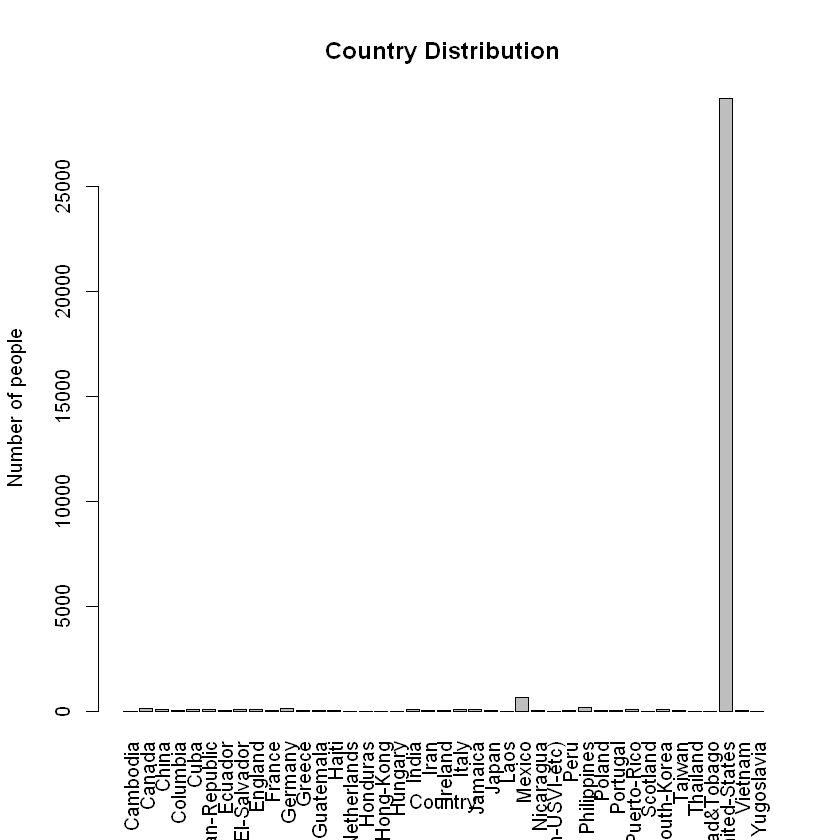

In [111]:
#native.country
native.country = adult$native.country
#max
max(native.country, na.rm = TRUE)
#min
min(native.country, na.rm = TRUE)
#frequency table
print("Frequency table")
cbind(freq=table(native.country))
#missing values
paste("Missing values:", sum(is.na(native.country)))
#plot
barplot(table(native.country), main="Country Distribution", xlab="Country", ylab="Number of people", las=3)

<p>As the values aren't numeric, there's no way of getting the mean. Also, because the total amount of unique values is even, there's no way of getting the median. To determine max and min, R sorts values alphabetically, since the maximum appears as "Yugoslavia" and the minimum one is "Cambodia." There's no way of determining standard deviation for text values. As the values for the United States are so high, it is very difficult to analyze this graph because the other values are very small by comparison.</p>
<h4>Salaries</h4>

[1] "Mean: 39306.4554209306"

[1] "Median: 33927"

[1] "Max: 140000"

[1] "Min: 38.3412463124841"

[1] "Standard deviation: 17356.3913390376"

[1] "Missing values: 0"

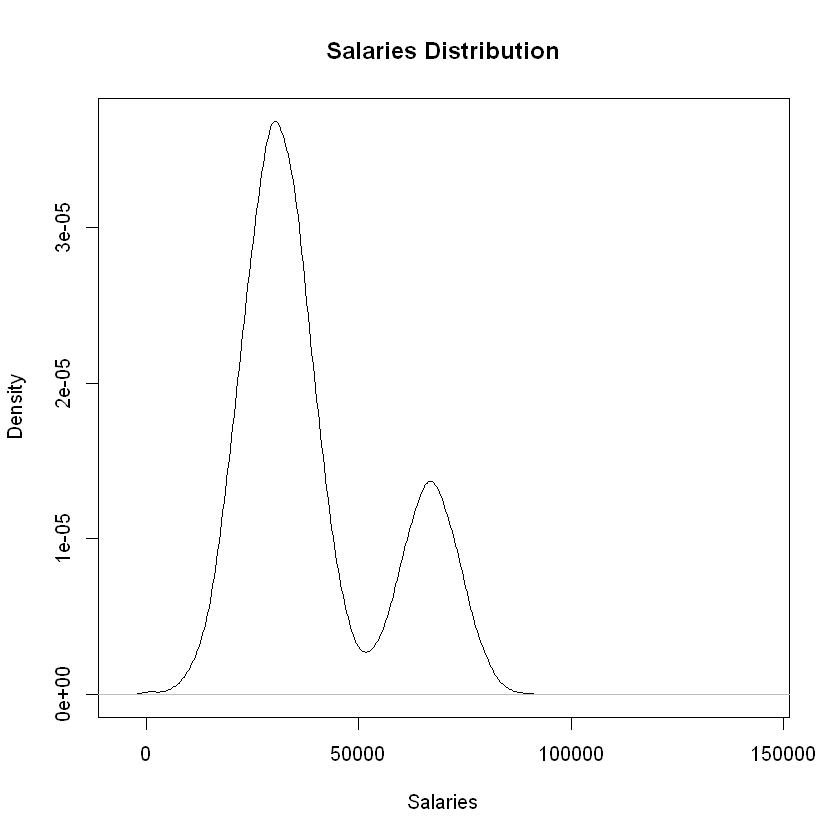

In [112]:
#salaries
salaries = adult$salaries
#mean
paste("Mean:", mean(salaries, na.rm=TRUE))
#median
paste("Median:", median(salaries, na.rm=TRUE))
#max
paste("Max:", max(salaries, na.rm = TRUE))
#min
paste("Min:", min(salaries, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(salaries, na.rm = TRUE))
#missing values
paste("Missing values:", sum(is.na(salaries)))
#plot
plot(density(salaries, na.rm = TRUE), xlab="Salaries", main = "Salaries Distribution")

<p>Since salary is not a categorical feature, a frequency table yielded a table very hard to manage, so it was not used.</p>
<p>We assume that all of these values are in USD. The mean displays an average a little over 40000. The median is very similar, at 33927, but it does vary a bit compared to the mean. We can see an exorbitant high of 140000, compared with the min of just above 38. Standard deviation at 17356 is the biggest on this data set. Missing values at 0 is very rare for this data set, but it happens here,</p>
<p>The graph shows two very big groups, the one between approximately 10000 and 50000, and another one between 55000 and approximately 75000. After that, figures drop sginificantly until they're almost non-existant at the 95000 mark.</p>
<h4>Job Satisfaction</h4>

[1] "Mean: 7.54887749147753"

[1] "Median: 7"

[1] "Max: 15"

[1] "Min: 0"

[1] "Standard deviation: 4.45740991120085"

[1] "Frequency table"


,freq
0,1757
1,1495
2,1811
3,2162
4,2457
5,2452
6,2235
7,2123
8,2070
9,2064


[1] "Missing values: 0"

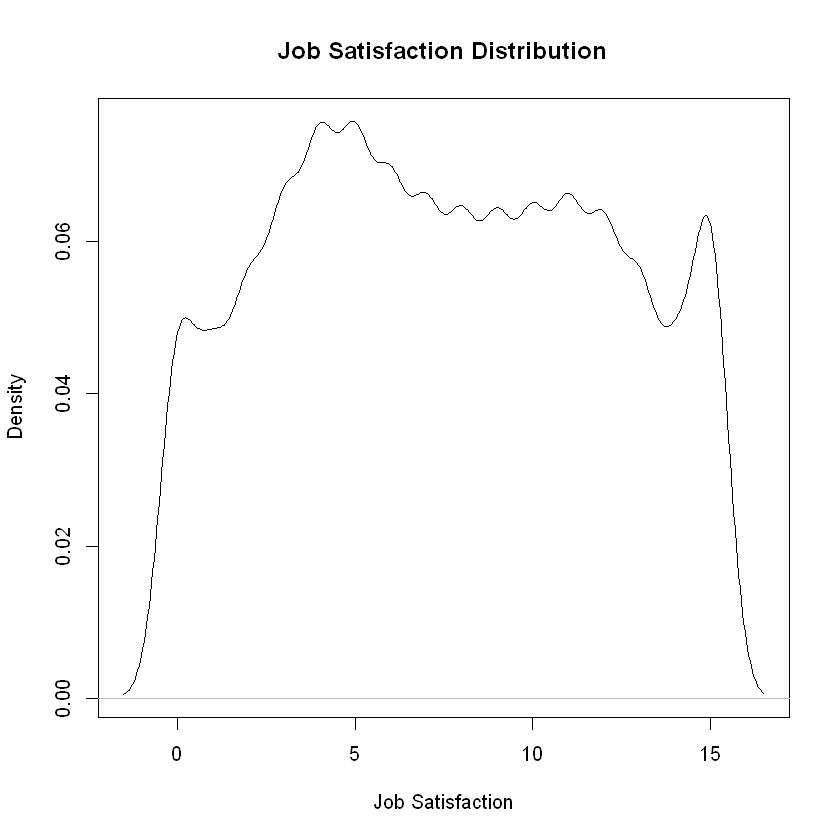

In [113]:
#jobsatisfaction
jobsatisfaction = adult$jobsatisfaction
#mean
paste("Mean:", mean(jobsatisfaction, na.rm=TRUE))
#median
paste("Median:", median(jobsatisfaction, na.rm=TRUE))
#max
paste("Max:", max(jobsatisfaction, na.rm = TRUE))
#min
paste("Min:", min(jobsatisfaction, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(jobsatisfaction, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(jobsatisfaction))
#missing values
paste("Missing values:", sum(is.na(jobsatisfaction)))
#plot
plot(density(jobsatisfaction, na.rm = TRUE), xlab="Job Satisfaction", main = "Job Satisfaction Distribution")

<p>This is the most equally distributed field in the data set. The minimum is 0 and the maximum is 15, while the mean is 7.54 and the median is 7. These values are more similar to what you would fine on a normal distributed data set. Standard deviation at 4 is the lowest in the whole set.</p>
<p>We can see in the frequency table and the graph that all values are similarly present. Even though 1 is the least present value and 4 is the most, all values have similar representation. There is a big spike at 15, signaling people who are extremely happy with their job.</p>
<h4>Male</h4>

[1] "Mean: 1"

[1] "Median: 1"

[1] "Max: 1"

[1] "Min: 1"

[1] "Standard deviation: 0"

[1] "Frequency table"


,freq
1,21790


[1] "Missing values: 10771"

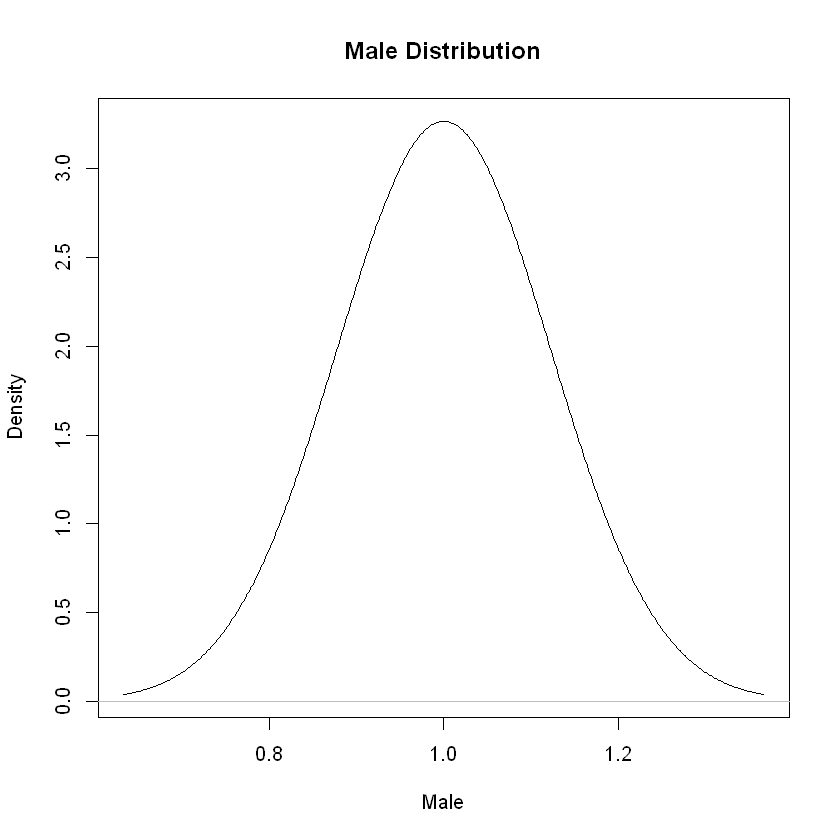

In [114]:
#male
male = adult$male
#mean
paste("Mean:", mean(male, na.rm=TRUE))
#median
paste("Median:", median(male, na.rm=TRUE))
#max
paste("Max:", max(male, na.rm = TRUE))
#min
paste("Min:", min(male, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(male, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(male))
#missing values
paste("Missing values:", sum(is.na(male)))
#plot
plot(density(male, na.rm = TRUE), xlab="Male", main = "Male Distribution")

<p>Since this is a boolean kind of value, in which is the entry is male it has 1, and if not, it has NA, values are unsurprisingly 1 all across median, mean, max and min. Standard deviation is 0 because there's no deviation. All of the missing values correspond to the females in the data set, and the graph shows a perfect distribution.</p>
<h4>Female</h4>

[1] "Mean: 1"

[1] "Median: 1"

[1] "Max: 1"

[1] "Min: 1"

[1] "Standard deviation: 0"

[1] "Frequency table"


,freq
1,10771


[1] "Missing values: 21790"

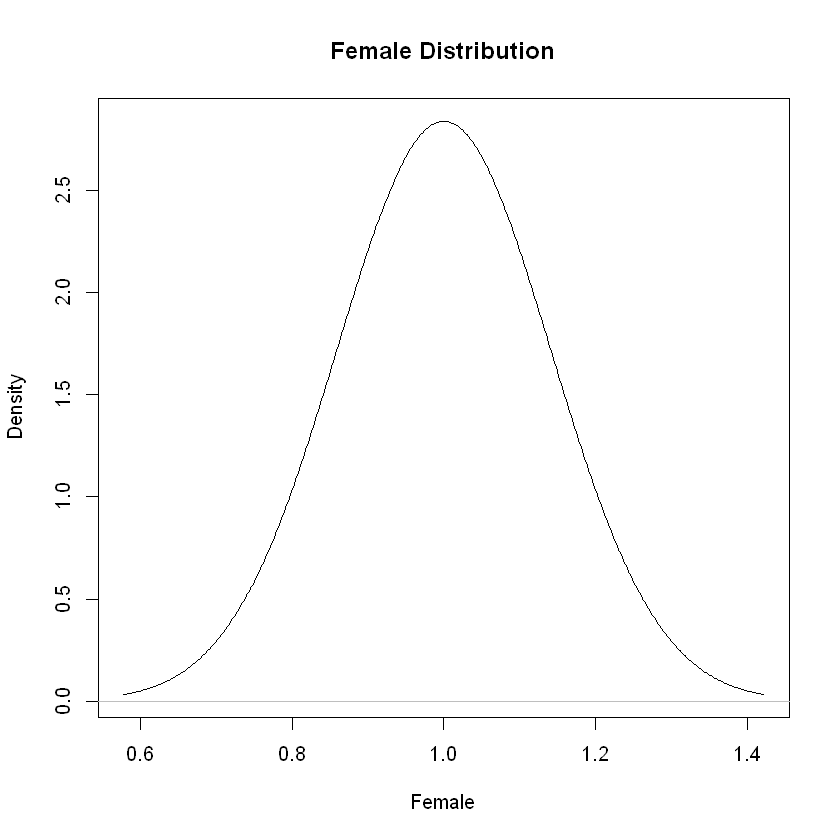

In [115]:
#female
female = adult$female
#mean
paste("Mean:", mean(female, na.rm=TRUE))
#median
paste("Median:", median(female, na.rm=TRUE))
#max
paste("Max:", max(female, na.rm = TRUE))
#min
paste("Min:", min(female, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(female, na.rm = TRUE))
#frequency table
print("Frequency table")
cbind(freq=table(female))
#missing values
paste("Missing values:", sum(is.na(female)))
#plot
plot(density(female, na.rm = TRUE), xlab="Female", main = "Female Distribution")

<p>Since this is a boolean kind of value, in which is the entry is female it has 1, and if not, it has NA, values are unsurprisingly 1 all across median, mean, max and min. Standard deviation is 0 because there's no deviation. All of the missing values correspond to the males in the data set, and the graph shows a perfect distribution.</p>

<h3>Exercise 3</h3>

In [116]:
#age
paste("IQR:", IQR(age, na.rm = TRUE))
paste("Upper limit:", quantile(age, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(age, 0.25, na.rm = TRUE) / 1.5)

[1] "IQR: 20"

[1] "Upper limit: 72"

[1] "Lower limit: 18.6666666666667"

<p>Regarding the upper limit, only 18 and 17 would be affected by this, but there are a lot of values of 17 and 18, so removing them would directly affect the data. It is probably not a good idea. The same applies for the upper side of the data, the threshold is very low at 72, when there are a lot of values which are greater than this. Even the highest value, 90, is repeated 43 times, so removing it would make no sense. There are people working at that age, that is a fact and should not be considered an outlier.</p>

In [117]:
#capital.gain
paste("IQR:", IQR(capital.gain, na.rm = TRUE))
paste("Upper limit:", quantile(capital.gain, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(capital.gain, 0.25, na.rm = TRUE) / 1.5)

#capital.loss
paste("IQR:", IQR(capital.loss, na.rm = TRUE))
paste("Upper limit:", quantile(capital.loss, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(capital.loss, 0.25, na.rm = TRUE) / 1.5)

[1] "IQR: 0"

[1] "Upper limit: 0"

[1] "Lower limit: 0"

[1] "IQR: 0"

[1] "Upper limit: 0"

[1] "Lower limit: 0"

<p>With these upper and lower quartile values, removing some of them in any of these fields would mean that a lot of information is lost, since all of the values are above the upper limit, so no values were removed.</p>

In [118]:
#salaries
paste("IQR:", IQR(salaries, na.rm = TRUE))
paste("Upper limit:", quantile(salaries, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(salaries, 0.25, na.rm = TRUE) / 1.5)

[1] "IQR: 21177"

[1] "Upper limit: 72327"

[1] "Lower limit: 18027.3333333333"

<p>Salaries have, in my opinion, two removable outliers: 100000 and 140000. Other values up the upper limit are actually very well represented so I don't think it is a good idea to remove them. These other two values are very rare and so far away from the rest that they should probably be removed. On the lower side of the data, there are a lot of values below the lower quartile but those are the actual salaries of some people so why should we remove them? However, four values are just way too low and there's no way someone can survive with these, and those are the values 126 and the three below that.</p>

<p>Calculations are done again for this feature:</p>

[1] "Mean: 39306.3185142846"

[1] "Median: 33928"

[1] "Max: 91182"

[1] "Min: 301.954831928015"

[1] "Standard deviation: 17340.3028587042"

[1] "Missing values: 0"

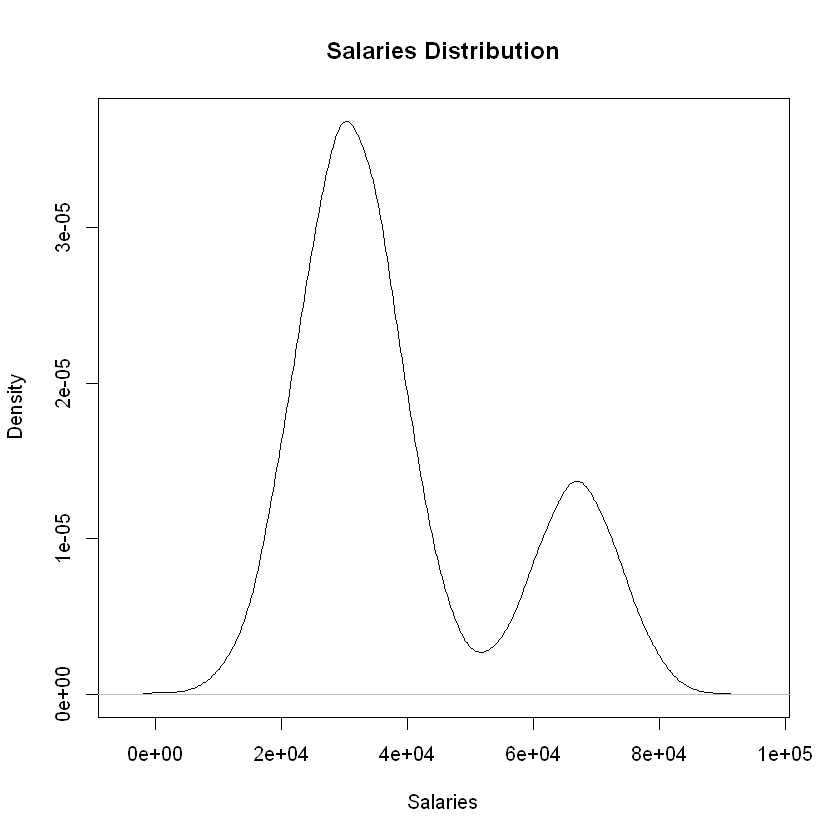

In [119]:
#new salary with removed values
salaries2 = adult[adult$salaries > 127 & salaries < 99999, ]$salaries
#mean
paste("Mean:", mean(salaries2, na.rm=TRUE))
#median
paste("Median:", median(salaries2, na.rm=TRUE))
#max
paste("Max:", max(salaries2, na.rm = TRUE))
#min
paste("Min:", min(salaries2, na.rm = TRUE))
#sd
paste("Standard deviation:", sd(salaries2, na.rm = TRUE))
#missing values
paste("Missing values:", sum(is.na(salaries2)))
#plot
plot(density(salaries2, na.rm = TRUE), xlab="Salaries", main = "Salaries Distribution")

<p>As expected, there's very little changes on mean and median, and obviously the max and min parameters changed. Standard deviation went down a little bit, from 17356 to 17340. Anyways, it is still high. The plot is now more compact and easier to read, since it doesn't have to accomodate the high values.</p>

In [120]:
#jobsatisfaction
paste("IQR:", IQR(jobsatisfaction, na.rm = TRUE))
paste("Upper limit:", quantile(jobsatisfaction, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(jobsatisfaction, 0.25, na.rm = TRUE) / 1.5)

[1] "IQR: 7"

[1] "Upper limit: 16.5"

[1] "Lower limit: 2.66666666666667"

<p>Since these values are part of a scale from 0 to 15, deleting values would make no sense, so there are no values that should be considered as outliers, so no values were removed.</p>

In [121]:
#male
paste("IQR:", IQR(male, na.rm = TRUE))
paste("Upper limit:", quantile(male, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(male, 0.25, na.rm = TRUE) / 1.5)

#female
paste("IQR:", IQR(female, na.rm = TRUE))
paste("Upper limit:", quantile(female, 0.75, na.rm = TRUE) * 1.5)
paste("Lower limit:", quantile(female, 0.25, na.rm = TRUE) / 1.5)

[1] "IQR: 0"

[1] "Upper limit: 1.5"

[1] "Lower limit: 0.666666666666667"

[1] "IQR: 0"

[1] "Upper limit: 1.5"

[1] "Lower limit: 0.666666666666667"

<p>It would make no sense to remove values here since they are closely related to each other and there's no outliers, just 1 and NA, so no values were removed.</p>

<h3>Exercise 4</h3>
<p>In the case of age, we can quickly see that absolutely all of the missing values have doctorate as an education. Almost all of them have Prof-specialty as occupation and United States as native country (although this last fact is true for almost all records). Thus, we can infer that the age values here are probably very similar to other doctorates.</p>
<p>Thus, we can complete the values of these entries by calculating the mean of all the doctorate values.</p>

In [122]:
mean(subset(adult, education == ' Doctorate')$age, na.rm = TRUE)

[1] 48.35127

<p>From this calculation, a total of 97 values were changed from NA to 48 and new calculations are made.</p>

In [123]:
#repetition of calculations
age2 = adult$age
age2[is.na(age2)] <- 48
#mean
mean(age2, na.rm=TRUE)

[1] 38.58846

<p>We can see that the mean increased slightly, just 0.02 points. This is good because it means that the change hasn't affected the overall data that much in regards to the average age of the records.</p>

In [124]:
#median
median(age2, na.rm=TRUE)

[1] 37

<p>No change on the median as well, which was a value that could change but fortunately didn't.</p>

In [125]:
#max
max(age2, na.rm = TRUE)
#min
min(age2, na.rm = TRUE)

[1] 90

[1] 17

<p>Since the values changed were nowhere near the maximum or minimum values, it makes sense that these values are unaltered.</p>

In [126]:
#sd
sd(age2, na.rm = TRUE)

[1] 13.63253

The standard deviation decreased a just 0.01, meaning that the values are a bit less dispersed, but nothing noteworthy.

In [127]:
#frequency table
cbind(freq=table(age2))

,freq
17,395
18,550
19,712
20,754
21,720
22,765
23,877
24,798
25,841
26,785


<p>This is where a greater change could be seen, since the number 48 went up from 541 to 638.</p>

In [128]:
#missing values
sum(is.na(age2))

[1] 0

<p>Obviously, now the NA values are 0 because all were replaced.</p>

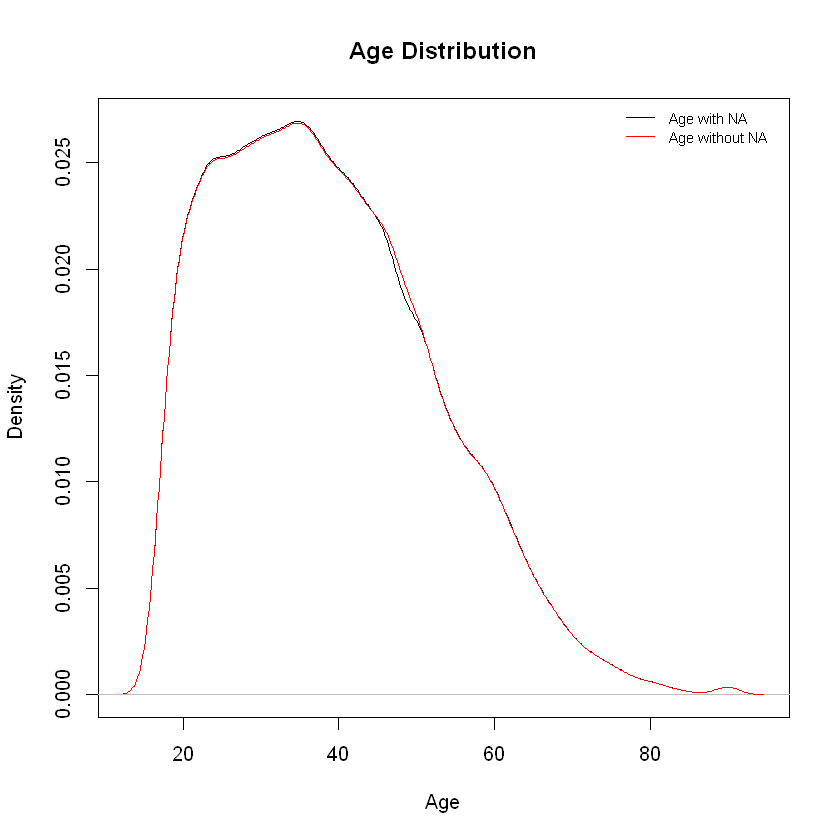

In [129]:
#plot
plot(density(age, na.rm = TRUE), xlab="Age", main = "Age Distribution")
lines (density(age2), col="red")
legend('topright', c("Age with NA", "Age without NA") , lty=1, col=c('black', 'red'), bty='n', cex=.75)

<p>The plot changes just a little bit around the 48 mark, unsurprisingly. The rest of the graph is virtually unchanged, as we can clearly see by the very few black dots present in the line. As previously said, I think this is good because it means that the values we added are not altering significantly the rest of the data.</p>

<p>In the case of native.country, it is very hard to find a pattern for the missing countries. Unlike age, all of the values are different, ages vary a lot, as do the education, positions, salaries, capital changes, satisfaction and gender. For this reason, in my opinion, there's no easy way, or at least we don't know it yet, to fill this data with information as we did for the age. Since the value is text and not numeric, there's no way of getting an average or something similar and fill the NA values with this numeric assumed value. Because of the overwhelming amount of entries with United-States as the country, we could assume that the missing entries might be from the United States too, but we are not sure, so I think it is better to leave them as NA.</p>

<h3>Exercise 5</h3>
<h4>Graph 1</h4>

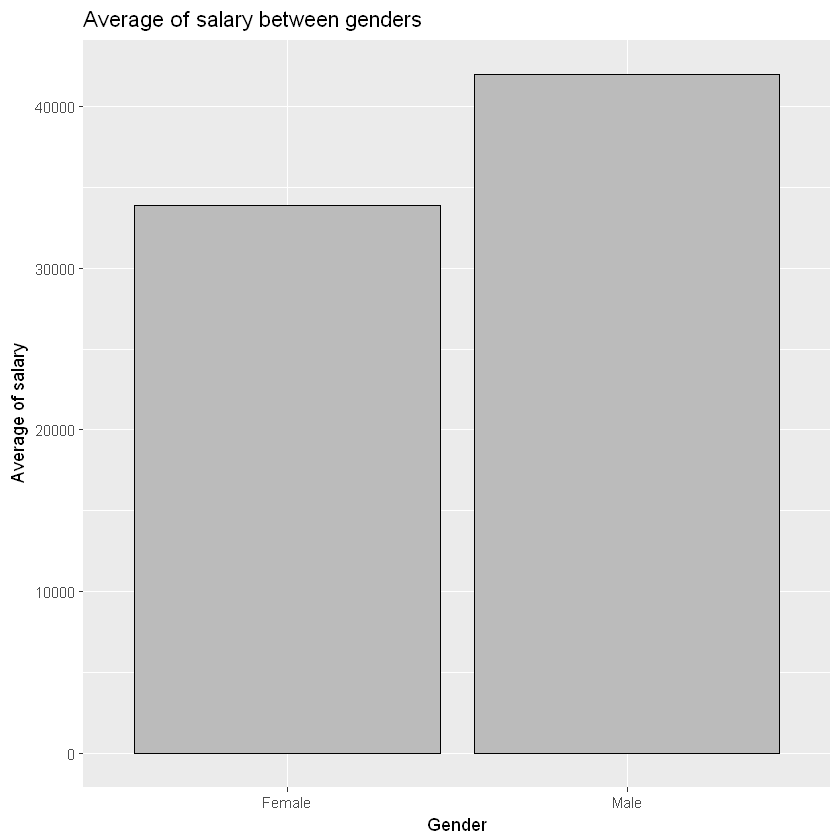

In [131]:
library(ggplot2)

maleData = adult[adult$male == 1, ]$salaries
maleMean = mean(maleData, na.rm = TRUE)

femaleData = adult[adult$female == 1, ]$salaries
femaleMean = mean(femaleData, na.rm = TRUE)

dat <- data.frame(
  averages = c("Male", "Female"),
  values = c(maleMean, femaleMean)
)

ggplot(data = dat, aes(x=dat$averages, y=dat$values), fill=dat$averages) +
  geom_bar(stat="identity", colour="black", fill="#bbbbbb") +
  xlab("Gender") + ylab("Average of salary") +
  guides(fill=TRUE) + 
  ggtitle("Average of salary between genders")

<p>The graph was generated by first gathering the averages of salary for males and females, and then creating a data frame with it. After that, the ggplot function was used, sending it the data, information for X and Y axis, formatting elements for the bars and setting the titles of the axis and title to make it more understandable. In theory, the guides function would show a legend but I couldn't manage to get it to work.</p>
<p>Simple graphic but clearly shows that on this sample, female employees are still earning less money than male people. Be it because female employees have less important positions or they're just earning less money for doing the same amount of job, the problem between inequality between pays and opportunities among females and males is still a problem to this days. In order to do a more meticulous study on if the discrepancy is because of women being in less favorable positions or just earning less, a more detailed data would be required, since this set has information of the activity people perform, but not what position do they have.</p>

<h4>Graph 2</h4>

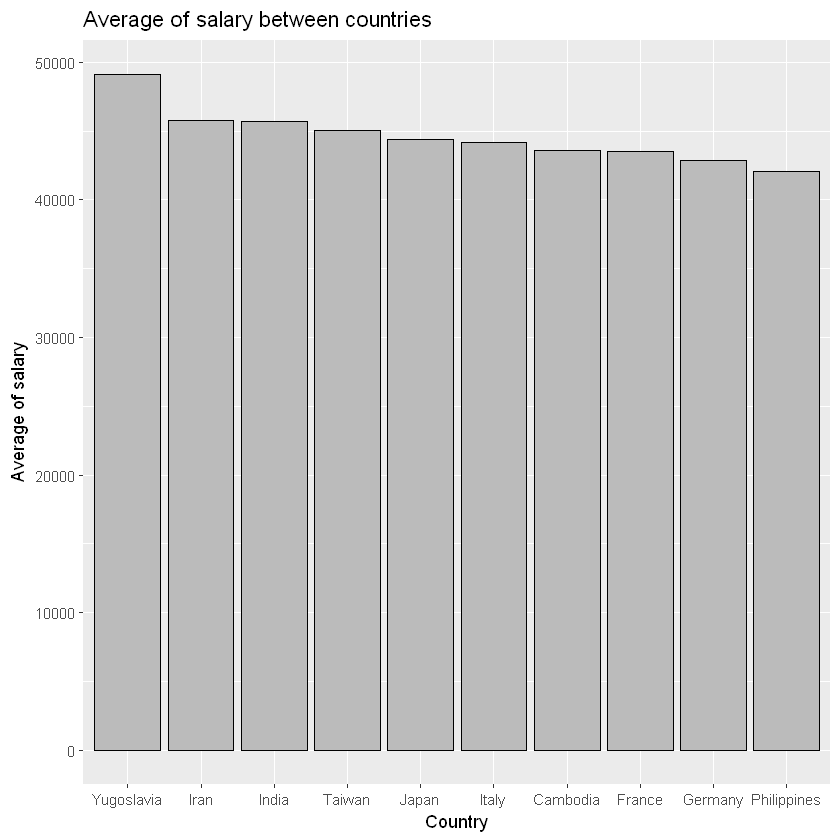

In [133]:
countriesClean <- subset(adult, !is.na(native.country))
df <- data.frame(countriesClean$native.country, countriesClean$salaries)
aggr <- aggregate(df$countriesClean.salaries ~ df$countriesClean.native.country, data = df, mean)
aggr2 <- aggr[order(aggr[,2], decreasing = TRUE), , drop = FALSE]
finaldf = head(aggr2, 10)

dat2 <- data.frame(
  countries = finaldf$`df$countriesClean.native.country`,
  values = finaldf$`df$countriesClean.salaries`
)

dat2$countries <- factor(dat2$countries, levels = dat2$countries[order(dat2$values, decreasing = TRUE)])

ggplot(data = dat2, aes(x=dat2$countries, y=dat2$values), fill=dat2$countries) +
  geom_bar(stat="identity", colour="black", fill="#bbbbbb") +
  xlab("Country") + ylab("Average of salary") +
  guides(fill=TRUE) + 
  ggtitle("Average of salary between countries")

<p>To generate this graph, first I filtered the countries that were empty, because if not, the aggregation wouldn't work. Then, the aggregation (similar to a GROUP BY in SQL) was done so that all salaries within a country were applied the function mean, to get the final average. Then, the top 10 were chosen, and the data frame was created. To make sure that the graph showed the values in order by the value and not by the name, a factor was added to the countries part of the data frame. The graph itself was generated in the same way as the first one.</p>
<p>Here we analyze the top 10 paying countries. It is interesting to not that, even though United States has a lot of values, the average of them didn't make it to the top 10. They have lot of workers but they don't earn that much. The first value is Yugoslavia with almost 50000 of average, followed by Iran with 45792 and India with 45700.</p>

<h4>Graph 3</h4>

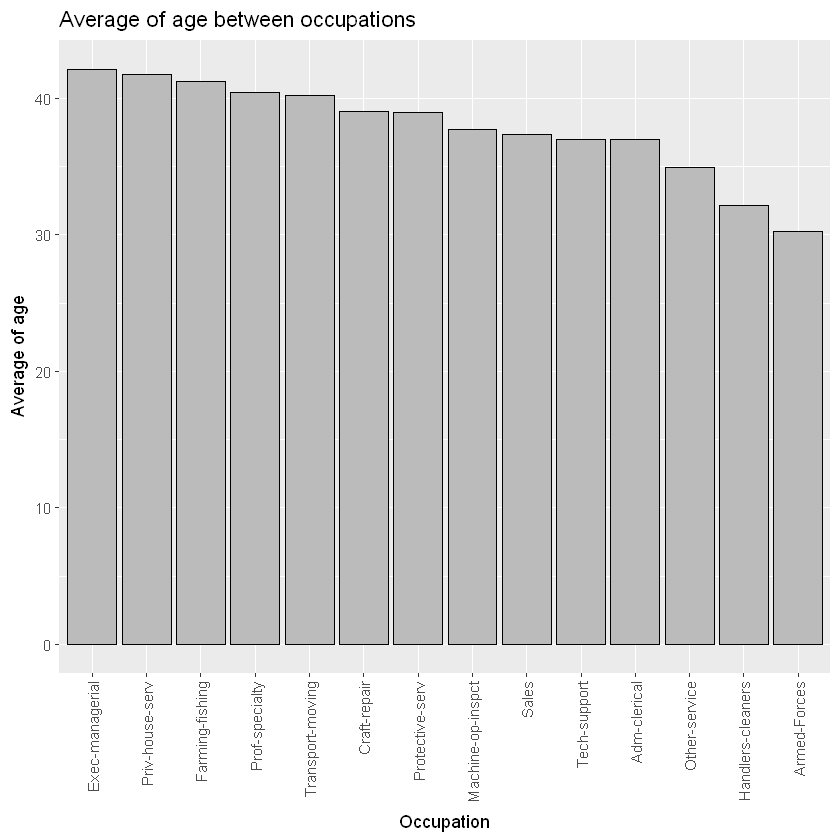

In [134]:
#graph 3
occClean <- subset(adult, !is.na(occupation) | is.na(age))
df3 <- data.frame(occClean$occupation, occClean$age)
aggrG3 <- aggregate(df3$occClean.age ~ df3$occClean.occupation, data = df3, mean)
aggrG3F <- aggrG3[order(aggrG3[,2], decreasing = TRUE), , drop = FALSE]
finaldfG3 = aggrG3F

dat3 <- data.frame(
  occupation = finaldfG3$`df3$occClean.occupation`,
  values = finaldfG3$`df3$occClean.age`
)

dat3$occupation <- factor(dat3$occupation, levels = dat3$occupation[order(dat3$values, decreasing = TRUE)])

ggplot(data = dat3, aes(x=dat3$occupation, y=dat3$values), fill=dat3$occupation) +
  geom_bar(stat="identity", colour="black", fill="#bbbbbb") +
  xlab("Occupation") + ylab("Average of age") +
  guides(fill=TRUE) + 
  ggtitle("Average of age between occupations") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

<p>This graph is generated in a similar way to the second one, but the angle of the X axis was changed in order to accomodate the longer names of the occupations. This was done through the theme function and setting it at a 90 degree angle over the axis.</p>
<p>We can see that the average of people in managerial activities are over 40 years old. Some things to note is that, unsurprisingly, the armed forces are one of the occupations with the youngest workers. Overall, although there are some jobs with a younger population than others, most of them are very similar to each other, with the youngest and the oldest group of people being only 12 years apart.</p>